# Why use a Pre-trained Model?

Pre-trained models are beneficial to us for many reasons. By using a pre-trained model you are saving time. Someone else has already spent the time and compute resources to learn a lot of features and your model will likely benefit from i

In [ ]:
# Importing the Keras libraries and packages

from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda ,Dense ,Flatten ,Dropout
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2

train_dir = "../input/project-numbers-dataset/dataset/train_data"
eval_dir = "../input/project-numbers-dataset/dataset/test_data"

# 2. Loading the data

In [ ]:
#Helper function to load images from given directories
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [ ]:
dir = '../input/hand-numbers-06/more_data'

In [ ]:
# #Helper function to load images from given directories
# def load_images1(directory):
#     images = []
#     labels = []
#     for idx1, label1 in enumerate(uniq_labels):
#         for file in os.listdir(directory + "/" + label1):
#             filepath = directory + "/" + label1 + "/" + file
#             image1 = cv2.resize(cv2.imread(filepath), (64, 64))
#             images1.append(image1)
#             labels1.append(idx1)
#     images1 = np.array(images1)
#     labels1 = np.array(labels1)
#     return(images1, labels1)

In [ ]:
import keras

uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(directory = train_dir)

if uniq_labels == sorted(os.listdir(eval_dir)):
    X_eval, y_eval = load_images(directory = eval_dir)

In [ ]:
labels

**Note:** In the train-test split I have used the stratify argument on the labels. This argument ensures that the data is split evenly along all labels 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, stratify = labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

eval_n = len(X_eval)
print("Number of evaluation images: ", eval_n)

In [ ]:
uniq_labels

# 3. Preprocessing: One-hot enconding the data

This conversion will turn the one-dimensional array of labels into a two-dimensional array. Each row in the two-dimensional array of one-hot encoded labels corresponds to a different label.

In [ ]:
y_train

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_eval = keras.utils.to_categorical(y_eval)

now just checking that is it converted or not.

In [ ]:
print(y_train[2])
print(len(y_train[0]))

# 4. Preprocessing

**Normalization will help us remove distortions caused by lights and shadows in an image**

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0

**NOTE:-**as you can see in the below image for transfer learning model we have to cut the last fully connected layer because we have to add our own fully connected layer. Now we have 40 classes so we will add fully connected layer of 40 classes,

# initializing all the models

VGG16

# Architecture of VGG16

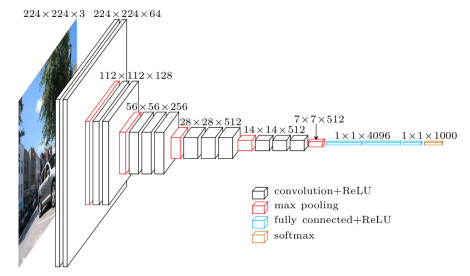

In [ ]:
#Initialising vgg16 
classifier_vgg16 = VGG16(input_shape= (64,64,3),include_top=False,weights='imagenet')

# Architecture of RESNET50

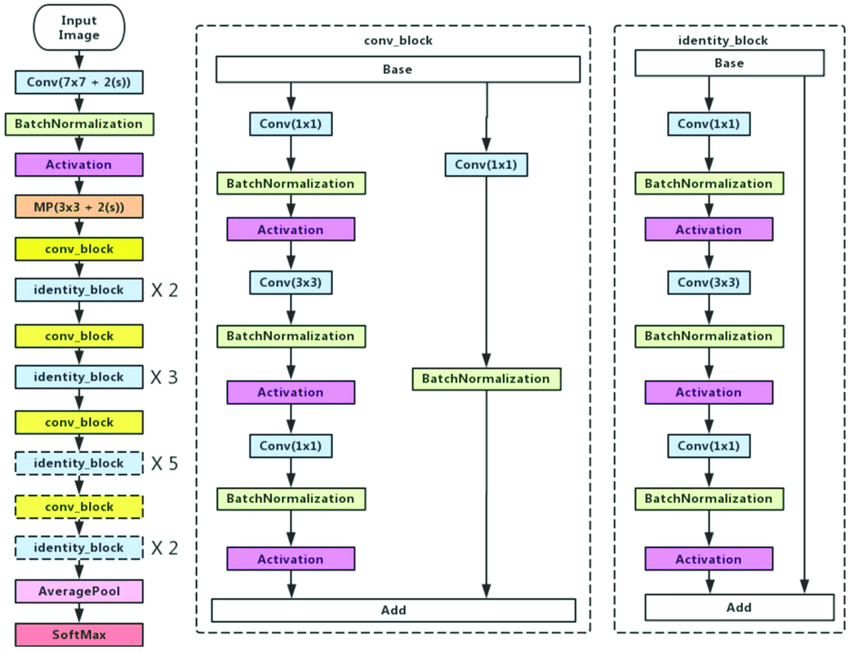

In [ ]:
#Initialising vgg16 
classifier_resnet = ResNet50(input_shape= (64,64,3),include_top=False,weights='imagenet')

In [ ]:
#don't train existing weights for vgg16
for layer in classifier_vgg16.layers:
    layer.trainable = False

#don't train existing weights for resnet50
for layer in classifier_resnet.layers:
    layer.trainable = False

In [ ]:
classifier1 = classifier_vgg16.output#head mode
classifier1 = Flatten()(classifier1)#adding layer of flatten
classifier1 = Dense(units=256, activation='relu')(classifier1)
classifier1 = Dropout(0.6)(classifier1)
classifier1 = Dense(units=10, activation='softmax')(classifier1)

model_vgg = Model(inputs = classifier_vgg16.input , outputs = classifier1)
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
classifier2 = classifier_resnet.output#head mode
classifier2 = Flatten()(classifier2)#adding layer of flatten
classifier2 = Dropout(0.6)(classifier2)
classifier2 = Dense(units=10, activation='softmax')(classifier2)

model_res = Model(inputs = classifier_resnet.input , outputs = classifier2)
model_res.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_vgg.summary()

In [ ]:
model_res.summary()

In [ ]:
#fit the model
#it will take some time to train
history_vgg = model_vgg.fit(X_train, y_train, epochs =5, batch_size = 64,validation_data=(X_test,y_test))

In [ ]:
model_vgg.save('final_vgg(64).h5')

In [ ]:
#fit the model
#it will take some time to train
history_res = model_res.fit(X_train, y_train, epochs =5, batch_size = 64,validation_data=(X_test,y_test))

In [ ]:

# Saving the model of resnet
model_res.save('model_resnet.h5')

Accuracy of **VGG16**

In [ ]:
score = model_vgg.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images(VGG):', round(score[1]*100, 3), '%')
score = model_vgg.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images(VGG):', round(score[1]*100, 3), '%')

Accuracy of **RESNET50**

In [ ]:
score = model_res.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images, RESNET):', round(score[1]*100, 3), '%')
score = model_res.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images , RESNET:', round(score[1]*100, 3), '%')

VGG16 accuracy and loss plot

In [ ]:
#vgg16
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('model accuracy of vgg16')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('model loss of vgg16')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

resnet50 accuracy and loss plot

In [ ]:
#vgg16
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history_res.history['accuracy'])
plt.plot(history_res.history['val_accuracy'])
plt.title('model accuracy of ResNet')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history_res.history['loss'])
plt.plot(history_res.history['val_loss'])
plt.title('model loss of ResNet')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# VGG16 confusion matrix

 This will be the matrix for the testing data, which gave a high accuracy. We expect to find the diagonal elements to have large values with some values distributed in non-diagonal elements. Note that our the matrix is not normalized, and the total number of testing images per label were 300.

In [ ]:
#Helper function to plot confusion matrix
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (15, 10))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model_vgg.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

**Next I will plot the confusion matrix for the evaluation images**

In [ ]:
y_eval_pred = model_vgg.predict(X_eval, batch_size = 512,verbose = 0)
plot_confusion_matrix(y_eval, y_eval_pred)

# RESNET50 confusion matrix

In [ ]:
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (15, 10))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix Resnet")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model_res.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

In [ ]:
y_eval_pred = model_res.predict(X_eval, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_eval, y_eval_pred)

# **DenseNet**

In [ ]:
from keras.applications.densenet import DenseNet121
classifier_densenet = DenseNet121(input_shape= (64,64,3),include_top=False,weights='imagenet')

In [ ]:
classifier_dense = classifier_densenet.output#head mode
classifier_dense = Flatten()(classifier_dense)#adding layer of flatten
classifier_dense = Dense(units=256, activation='relu')(classifier_dense)
classifier_dense = Dropout(0.6)(classifier_dense)
classifier_dense = Dense(units=10, activation='softmax')(classifier_dense)

model_densenet = Model(inputs = classifier_densenet.input , outputs = classifier_dense)
model_densenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#don't train existing weights for densenet50
# for layer in classifier_densenet.layers:
#     layer.trainable = False
    
for layer in classifier_densenet.layers[:-4]:
    layer.trainable=False
    
for layer in classifier_densenet.layers[-4:]:
    layer.trainable=True

In [ ]:
model_densenet.summary()

In [ ]:
#fit the model
#it will take some time to train
history_densenet = model_densenet.fit(X_train, y_train, epochs =5, batch_size = 64,validation_data=(X_test,y_test))

In [ ]:
# Saving the model of densenet.
# model_densenet.save('final_densenet.h5')

In [ ]:
score = model_densenet.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images(DenseNet):', round(score[1]*100, 3), '%')
score = model_densenet.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images(DenseNet):', round(score[1]*100, 3), '%')

In [ ]:
#densenet
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history_densenet.history['accuracy'])
plt.plot(history_densenet.history['val_accuracy'])
plt.title('model accuracy of DenseNet')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history_densenet.history['loss'])
plt.plot(history_densenet.history['val_loss'])
plt.title('model loss of DenseNet')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Helper function to plot confusion matrix
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (15, 10))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix of DenseNet")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model_densenet.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

In [ ]:
y_eval_pred = model_densenet.predict(X_eval, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_eval, y_eval_pred)

# **MobileNet**

In [ ]:
from keras.applications import MobileNetV2
classifier_mobilenet = MobileNetV2(input_shape= (64,64,3),include_top=False,weights='imagenet')

In [ ]:
# for layer in classifier_mobilenet.layers:
#     layer.trainable = False
for layer in classifier_mobilenet.layers[:-4]:
    layer.trainable=False

for layer in classifier_mobilenet.layers[-4:]:
    layer.trainable=True

In [ ]:
classifier_Mnet = classifier_mobilenet.output#head mode
classifier_Mnet = Flatten()(classifier_Mnet)#adding layer of flatten
classifier_Mnet = Dense(units=256, activation='relu')(classifier_Mnet)
classifier_Mnet = Dropout(0.6)(classifier_Mnet)
classifier_Mnet = Dense(units=10, activation='softmax')(classifier_Mnet)

model_Mnet = Model(inputs = classifier_mobilenet.input , outputs = classifier_Mnet)
model_Mnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_Mnet.summary()

In [ ]:
history_Mnet = model_Mnet.fit(X_train, y_train, epochs =5, batch_size = 64,validation_data=(X_test,y_test))

In [ ]:
#Saving the model of mobilenet.
model_Mnet.save('final_mobilenet.h5')

In [ ]:
score = model_Mnet.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images(MobileNet):', round(score[1]*100, 3), '%')
score = model_Mnet.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images(MobileNet):', round(score[1]*100, 3), '%')

In [ ]:
#mobilenet
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history_Mnet.history['accuracy'])
plt.plot(history_Mnet.history['val_accuracy'])
plt.title('model accuracy of MobileNet')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history_Mnet.history['loss'])
plt.plot(history_Mnet.history['val_loss'])
plt.title('model loss of MobileNet')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Helper function to plot confusion matrix
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (15, 10))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix of DenseNet")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model_Mnet.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

In [ ]:
y_eval_pred = model_Mnet.predict(X_eval, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_eval, y_eval_pred)

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('../input/project-numbers-dataset/dataset/train_data/6_six/102.jpg',target_size=(64,64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model_vgg.predict(test_image)



if result[0][0] == 1:
    prediction = '0'
elif result[0][1] == 1:
    prediction = '1'
elif result[0][2] == 1:
    prediction = '2'
elif result[0][3] == 1:
    prediction = '3'
elif result[0][4] == 1:
    prediction = '4'
elif result[0][5] == 1:
    prediction = '5'
elif result[0][6] == 1:
    prediction = '6'
elif result[0][7] == 1:
    prediction = 'C'
elif result[0][8] == 1:
    prediction = 'blank'
elif result[0][9] == 1:
    prediction = 'down'
else:
    prediction = ' none '
    
print(prediction)